In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('/content/data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [6]:
print(df.dtypes)

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [7]:
df['Дата'] = pd.to_datetime(df['Дата'])

Сгруппируйте данные по дате, посчитайте количество продаж

In [8]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

Вывести несколько первых строк сгруппированных данных

In [34]:
print(grouped_df.head())

         Дата  Количество
0  2018-01-04        3734
1  2018-01-05        3643
2  2018-01-06        3193
3  2018-01-07        3298
4  2018-01-09        4055


Нарисуйте график продаж у `grouped_df`

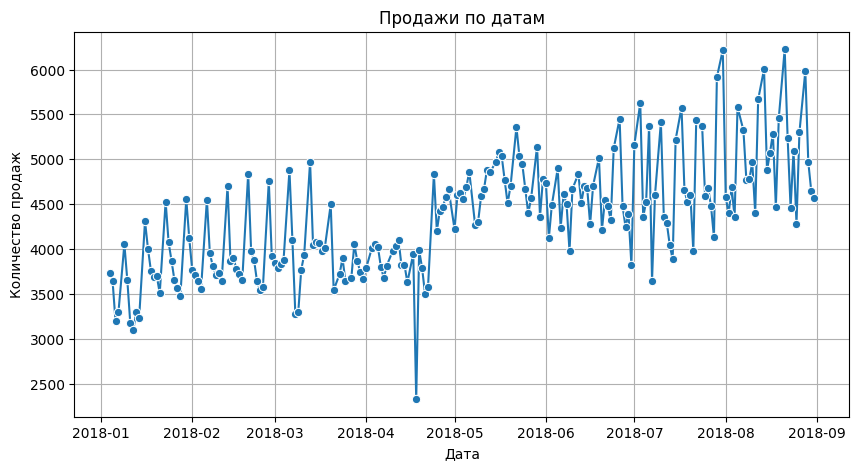

In [9]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped_df, x='Дата', y='Количество', marker='o')
plt.title('Продажи по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.show()


Опишите что вы видите на графике. Ваша задача - максимально описать график

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [10]:
outlier = df[df['Количество'] == df['Количество'].max()]
print("Максимальный выброс:")
print(outlier)

Максимальный выброс:
             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [11]:
df['Месяц'] = df['Дата'].dt.month
top_product = df[(df['Склад'] == 3) & (df['Месяц'].isin([6, 7, 8]))] \
    .groupby('Номенклатура')['Количество'].sum() \
    .sort_values(ascending=False).reset_index()
print("Топовый товар по складу 3 за лето:")
print(top_product)

Топовый товар по складу 3 за лето:
   Номенклатура  Количество
0     product_1       16046
1     product_2       13933
2     product_0       10387
3     product_3        6564
4     product_6        3923
5     product_4        3416
6     product_5        3355
7    product_22        3342
8    product_13        2372
9    product_15        1372
10   product_17        1009
11   product_18         886
12   product_19         793
13   product_10         775
14   product_11         769
15   product_12         753
16    product_8         555
17    product_7         549
18   product_20         485
19   product_21         484
20   product_23         402
21   product_14         350
22   product_16          58


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [31]:
import pandas as pd
weather_data = pd.read_excel("/content/погода_астана_2018.xlsx")
print(df.head())

  Местное время в Астане    T        Дата
0       01.09.2018 23:00  5.5  2018-09-01
1       01.09.2018 20:00  6.1  2018-09-01
2       01.09.2018 17:00  7.5  2018-09-01
3       01.09.2018 14:00  9.1  2018-09-01
4       01.09.2018 11:00  7.7  2018-09-01


In [44]:
weather_data['Местное время в Астане'] = pd.to_datetime(weather_data['Местное время в Астане'], dayfirst=True)
weather_data['Дата'] = weather_data['Местное время в Астане'].dt.date

daily_weather = weather_data.groupby('Дата')['T'].mean().reset_index()

grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата']).dt.date

merged_df = pd.merge(grouped_df, daily_weather, on='Дата', how='inner')


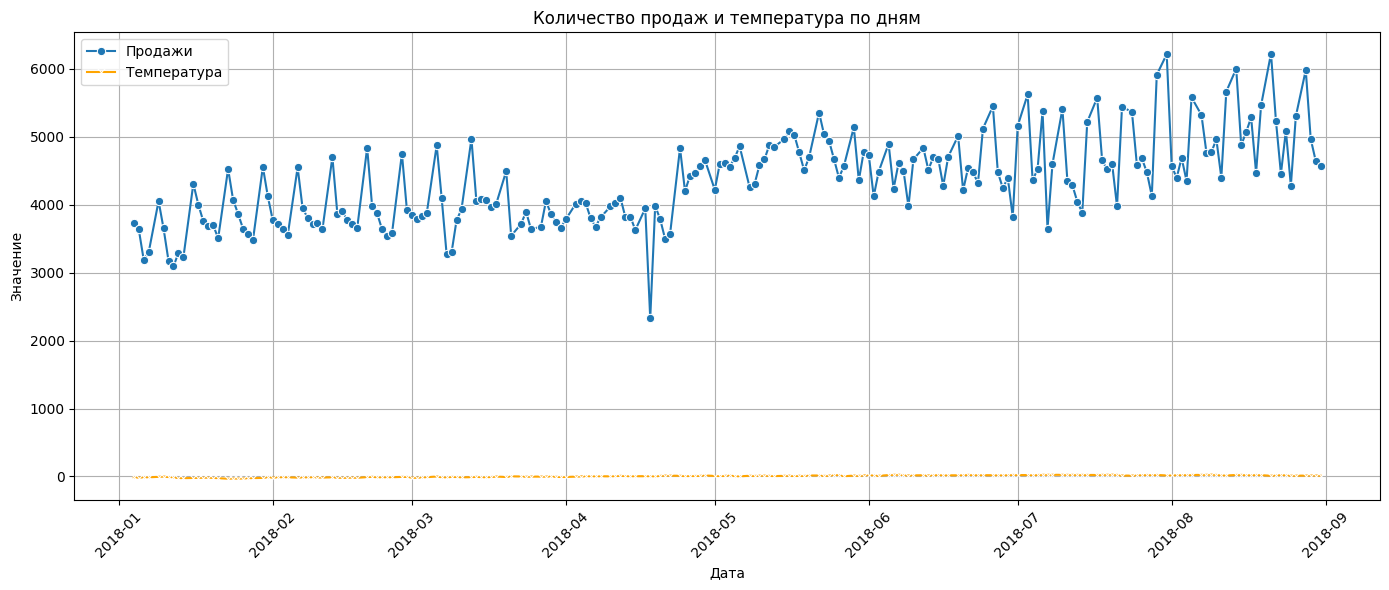

In [50]:
sns.lineplot(data=merged_df, x='Дата', y='Количество', label='Продажи', marker='o')
sns.lineplot(data=merged_df, x='Дата', y='T', label='Температура', color='orange', marker='x')

plt.title('Количество продаж и температура по дням')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


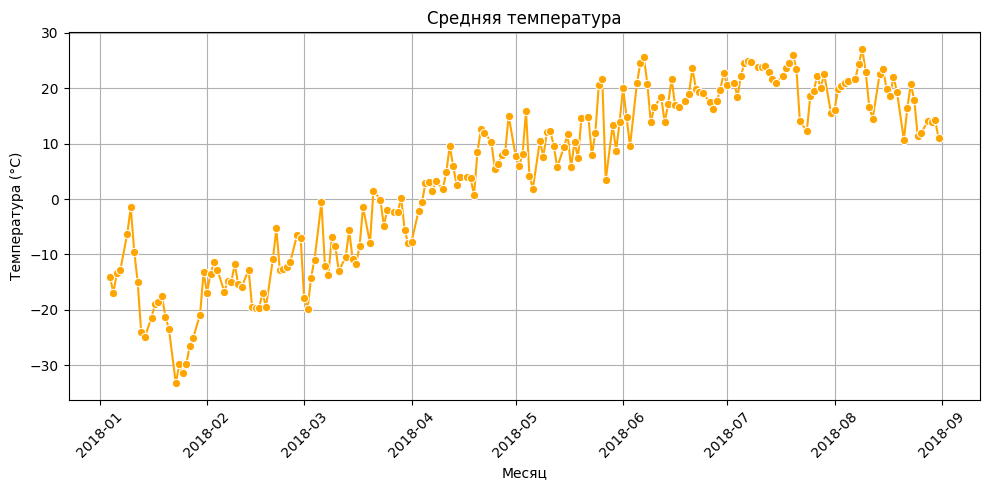

In [60]:
plt.figure(figsize=(10, 5))

sns.lineplot(data=merged_df, x='Дата', y='T', marker='o', color='orange')

plt.title('Средняя температура')
plt.xlabel('Месяц')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
